# Chapter 03 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Hospital error reduction

 Load the data

In [3]:
data = pd.read_csv("hospitalerrors.csv")
data.head()

,Control,Treatment
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


## Central location

 Calculate the mean

In [4]:
data.mean()

Control      1.88
Treatment    2.80
dtype: float64

 Calculate the median

In [5]:
data.median()

Control      2.0
Treatment    2.0
dtype: float64

## Variation

 Calculate the range

In [6]:
data.max() - data.min()

Control      4
Treatment    7
dtype: int64

 Calculate percentiles

In [7]:
data.quantile([0.25, 0.5, 0.75])

,Control,Treatment
0.25,1.0,2.0
0.50,2.0,2.0
0.75,2.0,3.0


 Calculate the interquartile range

In [8]:
data.quantile(0.75) - data.quantile(0.25)

Control      1.0
Treatment    1.0
dtype: float64

 Calculate the mean absolute deviation (pandas used to have a function to calculate this, but it was removed)

In [9]:
abs(data - data.mean()).mean()

Control      0.8448
Treatment    1.1520
dtype: float64

 Calculate the variance

In [10]:
data.var()

Control      1.276667
Treatment    2.833333
dtype: float64

 Calculate the population variance; divide by $N-1$

In [11]:
data.var(ddof=0)

Control      1.2256
Treatment    2.7200
dtype: float64

# Example: Musical genre preferences

 Create a data frame with the data

In [12]:
data = pd.DataFrame({
    "Rock": [7, 4, 9],
    "Hip-Hop": [1, 9, 1],
    "Country": [9, 1, 7],
    "Jazz": [1, 3, 2],
    "New Age": [3, 1, 2],
}, index=["A", "B", "C"])
data

,Rock,Hip-Hop,Country,Jazz,New Age
A,7,1,9,1,3
B,4,9,1,3,1
C,9,1,7,2,2


 Calculate the Euclidean distance between A and C

In [13]:
import numpy as np
np.sqrt(np.sum((data.loc["A"] - data.loc["C"])**2))

3.1622776601683795

 and between B and C

In [14]:
np.sqrt(np.sum((data.loc["B"] - data.loc["C"])**2))

11.269427669584644

 The distance between A and C is less than the distance between B and C, so A and C are more similar.

# Example: Reduction in major errors in hospitals} 

In [15]:
data = pd.read_csv("hospitalerrors_2.csv")

 Calculate the mean reduction in errors for the treatment and control groups

In [16]:
mean_reduction = data.groupby("Treatment")["Reduction"].mean()
mean_reduction

Treatment
0    1.88
1    2.80
Name: Reduction, dtype: float64

 The difference between the two means is the test statistic

In [17]:
print(f"Difference between the two means: {mean_reduction[1] - mean_reduction[0]:.2f}")

Difference between the two means: 0.92


# Frequency Tables

In [18]:
counts = data.groupby("Treatment")["Reduction"].value_counts()
frequency = pd.DataFrame({
    "Control": counts.loc[0],
    "Treatment": counts.loc[1],
}).fillna(0)
frequency["Total"] = frequency["Control"] + frequency["Treatment"]
frequency.loc["All"] = frequency.sum()
frequency

,Control,Treatment,Total
Reduction,,,
1,12.0,0.0,12.0
2,8.0,18.0,26.0
3,2.0,2.0,4.0
4,2.0,2.0,4.0
5,1.0,1.0,2.0
6,0.0,1.0,1.0
9,0.0,1.0,1.0
All,25.0,25.0,50.0


## Cumulative frequency table

In [19]:
cum_frequency = pd.DataFrame({
    "Frequency": frequency.loc[1:9, "Control"],
})
cum_frequency["Cumulative Frequency"] = cum_frequency["Frequency"].cumsum()
cum_frequency["Relative Frequency"] = cum_frequency["Frequency"] / cum_frequency["Frequency"].sum()
cum_frequency["Cumulative Relative Frequency"] = cum_frequency["Relative Frequency"] / cum_frequency["Relative Frequency"].sum()
cum_frequency

,Frequency,Cumulative Frequency,Relative Frequency,Cumulative Relative Frequency
Reduction,,,,
1,12.0,12.0,0.48,0.48
2,8.0,20.0,0.32,0.32
3,2.0,22.0,0.08,0.08
4,2.0,24.0,0.08,0.08
5,1.0,25.0,0.04,0.04
6,0.0,25.0,0.00,0.00
9,0.0,25.0,0.00,0.00


# Data Visualization

## Histogram

In [20]:
# determine counts data
counts = data[data["Treatment"] == 1]["Reduction"].value_counts()
# add zero values for error reductions of 7 and 8
counts.loc[7] = 0
counts.loc[8] = 0
counts = counts.sort_index()

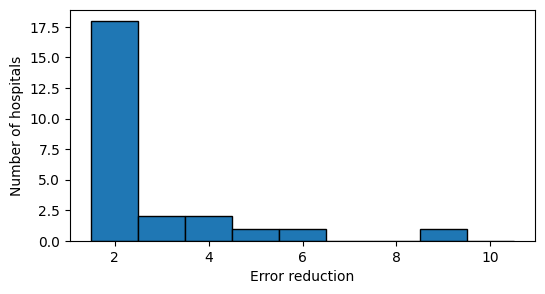

In [21]:
# we want bins to be centered on integers and therefore need to specify the bin edges
bins = [b + 1.5 for b in range(10)]
fig, ax = plt.subplots(figsize=(6, 3))
data[data["Treatment"] == 1]["Reduction"].plot.hist(bins=bins, ax=ax, edgecolor="black")
ax.set_xlabel("Error reduction")
ax.set_ylabel("Number of hospitals")
plt.show()

## Boxplots

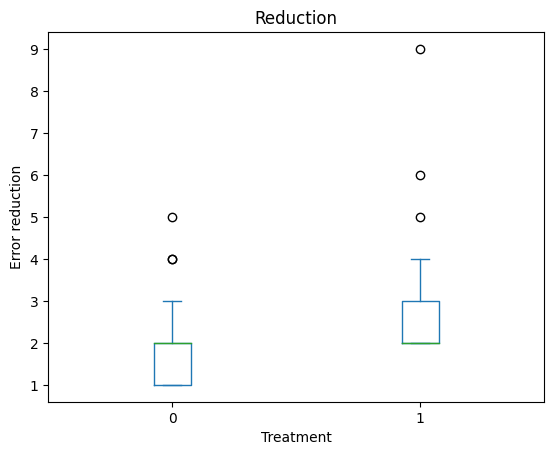

In [22]:
axes = data[['Reduction', 'Treatment']].plot.box('Treatment')
axes[0].set_xlabel("Treatment")
axes[0].set_ylabel("Error reduction")
plt.show()

# Histograms

## Histograms for lists of values

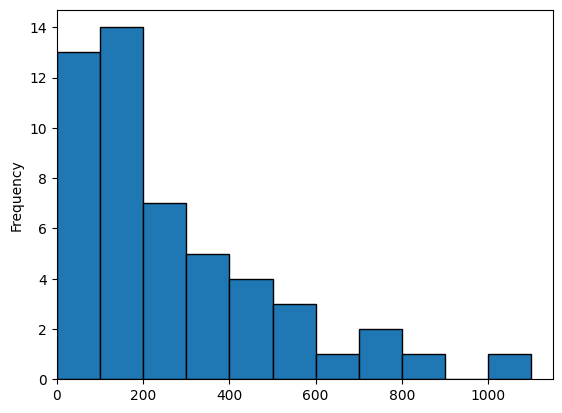

In [23]:
hospital_sizes = pd.read_csv('hospitalsizes.csv')
bins = [i * 100 for i  in range(12)]
ax = hospital_sizes['size'].plot.hist(bottom=0, bins=bins, edgecolor='black')
ax.set_xlim(0, 1150)
plt.show()

## Histograms for frequency tables

 If you already have a frequency table, you can use the `DataFrame.plot.bar` method. While this method is normally used to create a bar chart with categories on the $x$ axis, we can change its appearance to look like a histogram by setting the bar width to 1. In order to get a correct axis, you need to make sure that all bins have values in the frequency table. Here, this applies to the bar at a hospital size of 950.

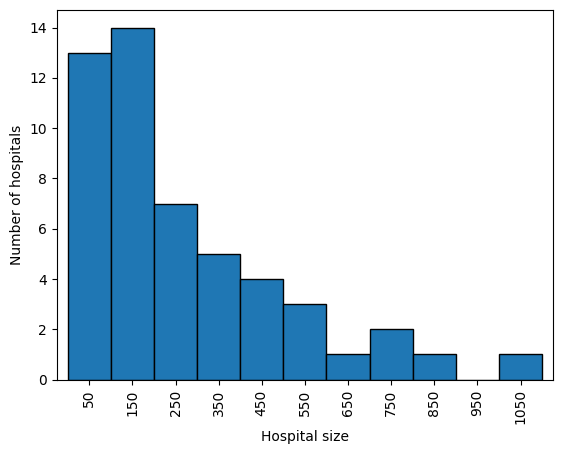

In [24]:
hospital_sizes_ft = pd.read_csv('hospitalsizes_frequencytable.csv')
ax = hospital_sizes_ft.plot.bar(x='size', y='frequency', width=1, edgecolor="black", legend=False)
ax.set_xlabel("Hospital size")
ax.set_ylabel("Number of hospitals")
plt.show()

# Box Plots

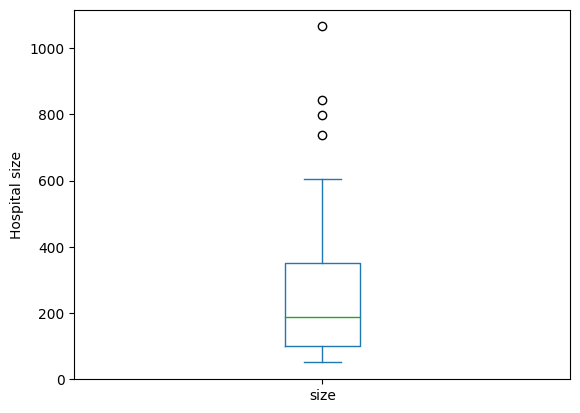

In [25]:
hospital_sizes = pd.read_csv('hospitalsizes.csv')
ax = hospital_sizes['size'].plot.box()
ax.set_ylabel('Hospital size')
plt.show()

 a. Prepare the dataset and count the number of `H` in each run

In [26]:
runs = [
    'HHHTTHTTHH', 'TTHHHTTTHH', 'TTHHTHHTTT', 'HTTHTHHTTT', 'HTHTHTHTTT',
    'TTHTTTTHHH', 'HHHTHTHHHH', 'HHTHHHTTTH', 'HHTTTTHTTT', 'THHTTTHTTH',
    'TTHHHTTHHT', 'TTTHHHHTHT', 'TTHTHTTTTT', 'THTHHHTTTT', 'THTHHHTTTT',
    'HHTTHTHHHH', 'HTTHTHTHTH', 'THHTHHHHHT', 'THHHTTHTTT', 'THTHHHTHTH'
]
counts = [run.count('H') for run in runs]

 b. Prepare the frequency table

In [27]:
freq_table = pd.Series(counts).value_counts().sort_index()
freq_table.index.name = 'Number of H'
freq_table.name = 'Frequency'
freq_table

Number of H
2    1
3    1
4    8
5    4
6    3
7    2
8    1
Name: Frequency, dtype: int64

 c.

In [28]:
# solution 1
print(f'{sum(count > 7 for count in counts) / len(counts):.3f}')
# solution 2
print(f'{freq_table[7:].sum() / freq_table.sum():.3f}')

0.050
0.000


 d. 

 Create several families with 10 children and determine the number of families with three or fewer girls

In [29]:
import random
random.seed(1234)  # set random seed for reproducibility
nrepeats = 1000
nchildren = 10

# create families with 10 children using resampling
nfamilies = 0
for _ in range(nrepeats):
    family = random.choices(['M', 'F'], k=10)  # sample with replacement
    number_of_girls = family.count('F')
    if number_of_girls <= 3:  # count the families with 3 or fewer girls
        nfamilies += 1
percentage = nfamilies / nrepeats

print(f'Percentage of families with three or fewer girls: {percentage:.2%}%')

Percentage of families with three or fewer girls: 17.00%%


 As an alternative, we can use the binomial distribution to calculate the probability.

In [30]:
from scipy.stats import binom

print(f'Percentage of families with three or fewer girls: {binom.cdf(3, 10, 0.5):.2%}%')

Percentage of families with three or fewer girls: 17.19%%


 Create a random population of 1000 values from a normal distribution with mean 100 and standard deviation 15

In [31]:
import random
random.seed(123)
population = [random.gauss(100, 15) for _ in range(1000)]

 Calculate the standard deviation of the population

In [32]:
# calculate the standard deviation of the population
pop_std = np.std(population, ddof=0)
print(f'Population standard deviation: {pop_std:.2f}')

Population standard deviation: 14.94


 Calculate the standard deviation of resamples of size 10 using $N$ and $N-1$  in the Denominator

In [33]:
resample_std_N = []
resample_std_N_1 = []
for _ in range(1000):
    resample = random.sample(population, 10)
    resample_std_N.append(np.std(resample, ddof=0))
    resample_std_N_1.append(np.std(resample, ddof=1))
    mean_resample_std_N = np.mean(resample_std_N)
    mean_resample_std_N_1 = np.mean(resample_std_N_1)
    print(f'Mean sample standard deviation (N): {mean_resample_std_N:.2f}')
    print(f'Mean sample standard deviation (N-1): {mean_resample_std_N_1:.2f}')

Mean sample standard deviation (N): 18.77
Mean sample standard deviation (N-1): 19.79
Mean sample standard deviation (N): 15.96
Mean sample standard deviation (N-1): 16.83
Mean sample standard deviation (N): 14.80
Mean sample standard deviation (N-1): 15.60
Mean sample standard deviation (N): 15.43
Mean sample standard deviation (N-1): 16.27
Mean sample standard deviation (N): 16.01
Mean sample standard deviation (N-1): 16.87
Mean sample standard deviation (N): 15.09
Mean sample standard deviation (N-1): 15.91
Mean sample standard deviation (N): 14.47
Mean sample standard deviation (N-1): 15.26
Mean sample standard deviation (N): 14.11
Mean sample standard deviation (N-1): 14.88
Mean sample standard deviation (N): 14.27
Mean sample standard deviation (N-1): 15.04
Mean sample standard deviation (N): 13.87
Mean sample standard deviation (N-1): 14.62
Mean sample standard deviation (N): 13.81
Mean sample standard deviation (N-1): 14.56
Mean sample standard deviation (N): 13.36
Mean sample 

 Plot the distribution of these standard deviations for both cases and compare to the standard deviation of the original population

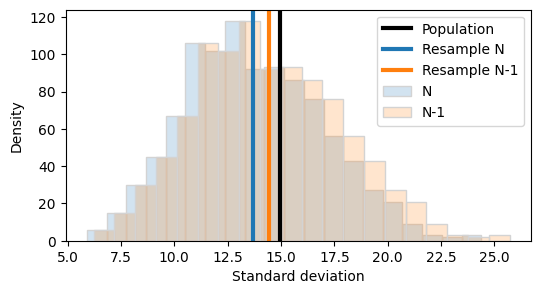

In [34]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 3))
sns.histplot(resample_std_N, color='C0', ax=ax, label='N', alpha=0.2,
             edgecolor='lightgrey')
sns.histplot(resample_std_N_1, color='C1', ax=ax, label='N-1', alpha=0.2,
             edgecolor='lightgrey')
ax.axvline(pop_std, color='k', label='Population', linewidth=3)
ax.axvline(mean_resample_std_N, color='C0', label='Resample N', linewidth=3)
ax.axvline(mean_resample_std_N_1, color='C1', label='Resample N-1', linewidth=3)
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Density')
ax.legend()
plt.show()

 We can see that the standard deviation of the resamples using $N-1$ in the denominator is closer to the population standard deviation.